<h1>Data wrangling and EDA</h1>
<p>In this notebook we import and perform data wrangling from csv files created in notebooks 02-EDA and 02-data-wrangling-daily-moves.</p>
<p>These files are:</p>
<ul>
    <li>grouped_pct_change_df.csv</li>
    <li>grouped_relu_df.csv</li>
    <li>grouped_zscore_df.csv</li>
    <li>daily_moves.csv</li>
</ul>
<p>These files have the dataset of statistics of the bitcoin price that will be used for building daily technical indicators of the price and to perform EDA.</p>

<h3>Technical indicators</h3>
<p>We will build well stablished and used technical price indicators for each day.</p>
<p>These technical indicators are: MACD, RSI, stochastic, ROC, Money flow Index.</p>

<h3>EDA</h3>
<p>The EDA is mostly focused on finding possible clusters of the bitcoin price given price movement statistics and technical indicators.</p>
<p>We construct scatter plots to look for possible clusters.</p>

In [1]:
#Importing libraries
import time
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h2>Wrangling data</h2>
<p>Importing grouped and aggregated datasets for cleaning</p>

In [2]:
column_names = ['open_mean', 'open_std', 'open_max', 'open_min', 'open_max-min', 
                'high_mean', 'high_std', 'high_max', 'high_min', 'high_max-min',
                'low_mean',  'low_std',  'low_max',  'low_min',  'low_max-min',
                'close_mean', 'close_std', 'close_max', 'close_min', 'close_max-min', 'close_up_down',
                'volume', 'volume_pct_change', 'volume_up_down', 
                'close_last_price', 'high_max_price', 'low_min_price']

relu_column_names = ['open_mean', 'open_std', 'open_max',
                     'high_mean', 'high_std', 'high_max',
                     'low_mean',  'low_std', 'low_max', 
                     'close_mean', 'close_std', 'close_max', 'close_up_down',
                     'volume', 'volume_pct_change', 'volume_up_down', 
                     'close_last_price', 'high_max_price', 'low_min_price']

In [3]:
#import datasets
grouped_pct_change_df = pd.read_csv('../data/processed/grouped_pct_change_df.csv', names = column_names, index_col = 0, parse_dates = True)
grouped_relu_df = pd.read_csv('../data/processed/grouped_relu.csv', names = relu_column_names, index_col = 0, parse_dates = True)
grouped_zscore_df = pd.read_csv('../data/processed/grouped_zscore.csv', names = column_names, index_col = 0, parse_dates = True)

In [4]:
grouped_pct_change_df.head()

,open_mean,open_std,open_max,open_min,open_max-min,high_mean,high_std,high_max,high_min,high_max-min,...,close_max,close_min,close_max-min,close_up_down,volume,volume_pct_change,volume_up_down,close_last_price,high_max_price,low_min_price
NaN,open,open,open,open,open,high,high,high,high,high,...,close,close,close,close,volume,volume_%_change,volume_up_down,close_last,high_max,low_min
NaN,mean,std,max,min,<lambda_0>,mean,std,max,min,<lambda_0>,...,max,min,<lambda_0>,<lambda_1>,sum,NaN,NaN,NaN,NaN,NaN
date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-20,5.9404999524765976e-05,0.0022542612347937682,0.08554319931566301,0.0,0.08554319931566301,5.9404999524765976e-05,0.0022542612347937682,0.08554319931566301,0.0,0.08554319931566301,...,0.08554319931566301,0.0,0.08554319931566301,1.0,0.08547009,NaN,0,11.7,11.7,11.69
2011-08-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.08547009,0.0,0,11.7,11.7,11.7


In [5]:
grouped_relu_df.head()

,open_mean,open_std,open_max,high_mean,high_std,high_max,low_mean,low_std,low_max,close_mean,close_std,close_max,close_up_down,volume,volume_pct_change,volume_up_down,close_last_price,high_max_price,low_min_price
NaN,open,open,open,high,high,high,low,low,low,close,close,close,close,volume,volume:%_change,volume_up_down,close_last,high_max,low_min
NaN,mean,std,max,mean,std,max,mean,std,max,mean,std,max,<lambda_0>,NaN,NaN,NaN,NaN,NaN,NaN
date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-20,5.9404999524765976e-05,0.0022542612347937682,0.08554319931566301,5.9404999524765976e-05,0.0022542612347937682,0.08554319931566301,5.9404999524765976e-05,0.0022542612347937682,0.08554319931566301,5.9404999524765976e-05,0.0022542612347937682,0.08554319931566301,0.0,0.08547009,NaN,0,11.7,11.7,11.69
2011-08-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.08547009,0.0,0,11.7,11.7,11.7


In [6]:
grouped_zscore_df.head()

,open_mean,open_std,open_max,open_min,open_max-min,high_mean,high_std,high_max,high_min,high_max-min,...,close_max,close_min,close_max-min,close_up_down,volume,volume_pct_change,volume_up_down,close_last_price,high_max_price,low_min_price
NaN,open,open,open,open,open,high,high,high,high,high,...,close,close,close,close,volume,volume:%_change,volume_up_down,close_last,high_max,low_min
NaN,mean,std,max,min,<lambda_0>,mean,std,max,min,<lambda_0>,...,max,min,<lambda_0>,<lambda_1>,NaN,NaN,NaN,NaN,NaN,NaN
date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-20,-0.0015459904173094558,0.009464499668575358,0.3573571085164183,-0.0017954018828645203,0.3591525103992828,-0.001514346269251373,0.009793276900289931,0.3698563073639602,-0.0017724217755982266,0.3716287291395584,...,0.3416790926933371,-0.0018141852903878312,0.343493277983725,0.0,0.08547009,NaN,0,11.7,11.7,11.69
2011-08-21,-0.0017954018828644823,0.0,-0.0017954018828645203,-0.0017954018828645203,0.0,-0.0017724217755982882,0.0,-0.0017724217755982266,-0.0017724217755982266,0.0,...,-0.0018141852903878312,-0.0018141852903878312,0.0,0.0,0.08547009,0.0,0,11.7,11.7,11.7


In [7]:
#Dropping first 3 rows
grouped_pct_change_df = grouped_pct_change_df.iloc[3:]
grouped_pct_change_df.head()

,open_mean,open_std,open_max,open_min,open_max-min,high_mean,high_std,high_max,high_min,high_max-min,...,close_max,close_min,close_max-min,close_up_down,volume,volume_pct_change,volume_up_down,close_last_price,high_max_price,low_min_price
2011-08-20,5.9404999524765976e-05,0.0022542612347937682,0.08554319931566301,0.0,0.08554319931566301,5.9404999524765976e-05,0.0022542612347937682,0.08554319931566301,0.0,0.08554319931566301,...,0.08554319931566301,0.0,0.08554319931566301,1.0,0.08547009,NaN,0,11.7,11.7,11.69
2011-08-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.08547009,0.0,0,11.7,11.7,11.7
2011-08-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.02863249,-66.4999884755006,0,11.7,11.7,11.7
2011-08-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-100.0,0,11.7,11.7,11.7
2011-08-24,-0.0073861413028412,0.15825756563634696,0.0,-4.347826086956519,4.347826086956519,-0.0073861413028412,0.15825756563634696,0.0,-4.347826086956519,4.347826086956519,...,0.0,-4.347826086956519,4.347826086956519,0.0,2.35652174,inf,1,10.5,11.7,10.5


In [8]:
#Dropping first 3 rows
grouped_relu_df = grouped_relu_df.iloc[3:]
grouped_relu_df.head()

,open_mean,open_std,open_max,high_mean,high_std,high_max,low_mean,low_std,low_max,close_mean,close_std,close_max,close_up_down,volume,volume_pct_change,volume_up_down,close_last_price,high_max_price,low_min_price
2011-08-20,5.9404999524765976e-05,0.0022542612347937682,0.08554319931566301,5.9404999524765976e-05,0.0022542612347937682,0.08554319931566301,5.9404999524765976e-05,0.0022542612347937682,0.08554319931566301,5.9404999524765976e-05,0.0022542612347937682,0.08554319931566301,0.0,0.08547009,NaN,0,11.7,11.7,11.69
2011-08-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.08547009,0.0,0,11.7,11.7,11.7
2011-08-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02863249,-66.4999884755006,0,11.7,11.7,11.7
2011-08-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-100.0,0,11.7,11.7,11.7
2011-08-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.35652174,inf,1,10.5,11.7,10.5


In [9]:
#Dropping first 3 rows
grouped_zscore_df = grouped_zscore_df.iloc[3:]
grouped_zscore_df.head()

,open_mean,open_std,open_max,open_min,open_max-min,high_mean,high_std,high_max,high_min,high_max-min,...,close_max,close_min,close_max-min,close_up_down,volume,volume_pct_change,volume_up_down,close_last_price,high_max_price,low_min_price
2011-08-20,-0.0015459904173094558,0.009464499668575358,0.3573571085164183,-0.0017954018828645203,0.3591525103992828,-0.001514346269251373,0.009793276900289931,0.3698563073639602,-0.0017724217755982266,0.3716287291395584,...,0.3416790926933371,-0.0018141852903878312,0.343493277983725,0.0,0.08547009,NaN,0,11.7,11.7,11.69
2011-08-21,-0.0017954018828644823,0.0,-0.0017954018828645203,-0.0017954018828645203,0.0,-0.0017724217755982882,0.0,-0.0017724217755982266,-0.0017724217755982266,0.0,...,-0.0018141852903878312,-0.0018141852903878312,0.0,0.0,0.08547009,0.0,0,11.7,11.7,11.7
2011-08-22,-0.0017954018828644823,0.0,-0.0017954018828645203,-0.0017954018828645203,0.0,-0.0017724217755982882,0.0,-0.0017724217755982266,-0.0017724217755982266,0.0,...,-0.0018141852903878312,-0.0018141852903878312,0.0,0.0,0.02863249,-66.4999884755006,0,11.7,11.7,11.7
2011-08-23,-0.0017954018828644823,0.0,-0.0017954018828645203,-0.0017954018828645203,0.0,-0.0017724217755982882,0.0,-0.0017724217755982266,-0.0017724217755982266,0.0,...,-0.0018141852903878312,-0.0018141852903878312,0.0,0.0,0.0,-100.0,0,11.7,11.7,11.7
2011-08-24,-0.0328060633065785,0.6644432572393401,-0.0017954018828645203,-18.256112126088045,18.25431672420518,-0.03386032972829377,0.6875246479516126,-0.0017724217755982266,-18.890206524562547,18.88843410278695,...,-0.0018141852903878312,-17.46023340107012,17.45841921577973,0.0,2.35652174,inf,1,10.5,11.7,10.5


In [10]:
#Looking for null values
zscore_nullvalues = grouped_zscore_df.isnull().sum().sum()
relu_nullvalues = grouped_relu_df.isnull().sum().sum()
pctchange_nullvalues = grouped_pct_change_df.isnull().sum().sum()

print(zscore_nullvalues, relu_nullvalues, pctchange_nullvalues)

15 15 15


In [11]:
#null values are in the 'volume_pct_change' column
print(grouped_zscore_df.isnull().sum())
print('----------------------------')
print(grouped_relu_df.isnull().sum())
print('----------------------------')
print(grouped_pct_change_df.isnull().sum())

open_mean             0
open_std              0
open_max              0
open_min              0
open_max-min          0
high_mean             0
high_std              0
high_max              0
high_min              0
high_max-min          0
low_mean              0
low_std               0
low_max               0
low_min               0
low_max-min           0
close_mean            0
close_std             0
close_max             0
close_min             0
close_max-min         0
close_up_down         0
volume                0
volume_pct_change    15
volume_up_down        0
close_last_price      0
high_max_price        0
low_min_price         0
dtype: int64
----------------------------
open_mean             0
open_std              0
open_max              0
high_mean             0
high_std              0
high_max              0
low_mean              0
low_std               0
low_max               0
close_mean            0
close_std             0
close_max             0
close_up_down         

In [12]:
#Filling NaN values with 0.
grouped_zscore_df = grouped_zscore_df.fillna(0)
grouped_relu_df = grouped_relu_df.fillna(0)
grouped_pct_change_df = grouped_pct_change_df.fillna(0)


In [13]:
#The data is stored as strings.
grouped_pct_change_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3473 entries, 2011-08-20 to 2021-02-20
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   open_mean          3473 non-null   object
 1   open_std           3473 non-null   object
 2   open_max           3473 non-null   object
 3   open_min           3473 non-null   object
 4   open_max-min       3473 non-null   object
 5   high_mean          3473 non-null   object
 6   high_std           3473 non-null   object
 7   high_max           3473 non-null   object
 8   high_min           3473 non-null   object
 9   high_max-min       3473 non-null   object
 10  low_mean           3473 non-null   object
 11  low_std            3473 non-null   object
 12  low_max            3473 non-null   object
 13  low_min            3473 non-null   object
 14  low_max-min        3473 non-null   object
 15  close_mean         3473 non-null   object
 16  close_std          3473 non-null

In [14]:
#Changing the data to floats.
grouped_pct_change_df = grouped_pct_change_df.astype('float')
grouped_relu_df = grouped_relu_df.astype('float')
grouped_zscore_df = grouped_zscore_df.astype('float')

grouped_relu_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3473 entries, 2011-08-20 to 2021-02-20
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   open_mean          3473 non-null   float64
 1   open_std           3473 non-null   float64
 2   open_max           3473 non-null   float64
 3   high_mean          3473 non-null   float64
 4   high_std           3473 non-null   float64
 5   high_max           3473 non-null   float64
 6   low_mean           3473 non-null   float64
 7   low_std            3473 non-null   float64
 8   low_max            3473 non-null   float64
 9   close_mean         3473 non-null   float64
 10  close_std          3473 non-null   float64
 11  close_max          3473 non-null   float64
 12  close_up_down      3473 non-null   float64
 13  volume             3473 non-null   float64
 14  volume_pct_change  3473 non-null   float64
 15  volume_up_down     3473 non-null   float64
 16  close_last_pri

<h2>Building technical indicators</h2>
<p>We will build well stablished and used technical price indicators for each day.</p>
<p>These technical indicators are: MACD, RSI, stochastic, ROC, Money flow Index.</p>
<p>The indicators are oscilators, which can help us in the classification and clustering of daily price data.</p>

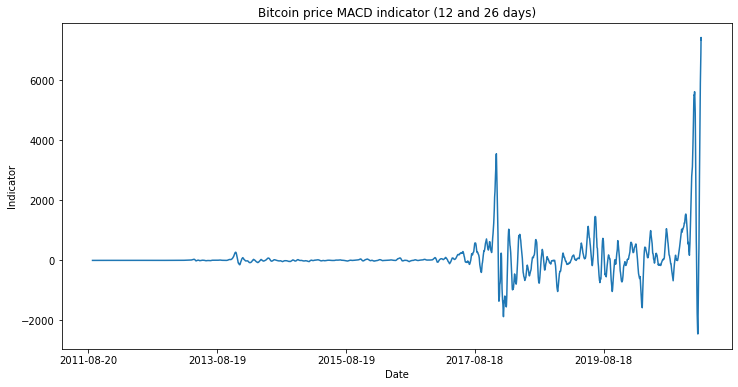

Number of observations by type


above_0_increasing    1167
above_0_decreasing     846
below_0_decreasing     765
below_0_increasing     695
Name: close_last_price, dtype: int64

In [15]:
#MACD or Moving Average Convergence Divergence.
#The MACD will be calculated as the difference between the 12-days and 26-days moving average.
#If the difference is positive we will assing a 1 and 0 if the difference is negative.

def get_macd(series):
    '''Takes a series and returns the Moving Average Convergence Divergence technical indicator
    as 1 if the difference is positive and 0 if the difference is negative'''
    
    MA_12 = series.rolling(12).mean()
    MA_26 = series.rolling(26).mean()
    macd = (MA_12 - MA_26)
    #series_1_0 = macd.apply(lambda x: 1 if x > 0 else 0)
    return macd

price_macd = get_macd(grouped_pct_change_df['close_last_price'])

plt.figure(figsize=(12,6))
plt.plot(price_macd)
plt.title('Bitcoin price MACD indicator (12 and 26 days)')
plt.ylabel('Indicator')
plt.xlabel('Date')
plt.xticks(np.arange(0, len(grouped_pct_change_df['close_last_price'] + 1), 365*2))
plt.show()

#Building a series of categrical features fot the macd indicator.
macd_label_window = 2
macd_labels = price_macd.rolling(macd_label_window)\
                        .apply(lambda x: 1 if (x[-1] > 0 and x[-1]-x[0] > 0)\
                                    else (2 if (x[-1] > 0 and x[-1]-x[0] < 0) \
                                    else (3 if (x[-1] < 0 and x[-1]-x[0] > 0)\
                                    else 4)))

macd_labels = macd_labels.apply(lambda x: 'above_0_increasing' if x==1\
                                    else ('above_0_decreasing' if x==2 \
                                    else ('below_0_increasing' if x==3\
                                    else 'below_0_decreasing')))  

print('Number of observations by type')                               
macd_labels.value_counts()


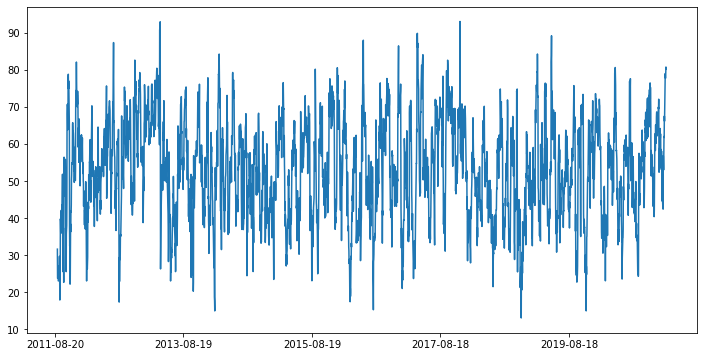

Number of observations by type


between_3070    2942
above_70         375
below_30         156
Name: close_last_price, dtype: int64

In [16]:
#RSI or Relative Strenght Index
#The RSI will be calculated as 100 - [100/(1+(avg gain/avg loss))]
#Avg gain/loss is calculated over a 14-day period.
#Important threshholds are >70 (overbought), <30 (oversold).

def get_rsi(series, window):
    series = series.pct_change()
    avg_gain = series.rolling(window).apply(lambda x: np.mean(x[x>0]))
    avg_loss = series.rolling(window).apply(lambda x: np.mean(x[x<0]))
    
    rsi = 100 - (100 / (1 + ((avg_gain/window)/(-1 * avg_loss/window))))
    return rsi

window_rsi = 14

rsi = get_rsi(grouped_pct_change_df['close_last_price'], window_rsi)

plt.figure(figsize=(12,6))
plt.plot(rsi)
plt.xticks(np.arange(0, len(grouped_pct_change_df['close_last_price'] + 1), 365*2))
plt.show()

#Building a series of categrical features fot the rsi indicator.
rsi_label = rsi.apply(lambda x: 'above_70' if x > 70 else ('below_30' if x < 30 else 'between_3070')) 

print('Number of observations by type')  
rsi_label.value_counts()


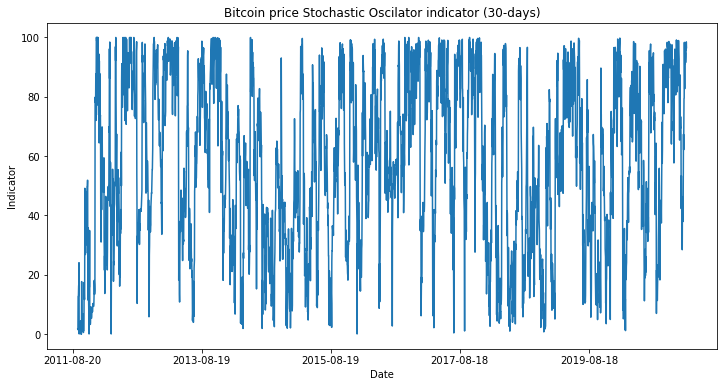

Number of observations by type


between_2080    2034
above_80        1005
below_20         434
dtype: int64

In [17]:
#Stochastic oscillator
#The stochastic is calculated as 100 * ((last_close_price - lowest_price_14-day)/(highest_price_14-day - lowest_price_14-day))
#Important threshholds are >80 (overbought), <20 (oversold).

def get_stochastic(close, high, low, window):
    high_window = high.rolling(window).max()
    low_window = low.rolling(window).min()
    
    stochastic = 100 * ((close - low_window)/(high_window - low_window))
    
    return stochastic

window_stochastic = 30

price_stochastic = get_stochastic(grouped_pct_change_df['close_last_price'],
                                  grouped_pct_change_df['high_max_price'],
                                  grouped_pct_change_df['low_min_price'],
                                  window_stochastic)


plt.figure(figsize=(12,6))
plt.plot(price_stochastic)
plt.title('Bitcoin price Stochastic Oscilator indicator ({}-days)'.format(window_stochastic))
plt.ylabel('Indicator')
plt.xlabel('Date')
plt.xticks(np.arange(0, len(grouped_pct_change_df['close_last_price'] + 1), 365*2))
plt.show()

#Building a series of categrical features fot the stochastic indicator.
stochastic_label = price_stochastic.apply(lambda x: 'above_80' if x > 80 else ('below_20' if x < 20 else 'between_2080')) 

print('Number of observations by type')  
stochastic_label.value_counts()


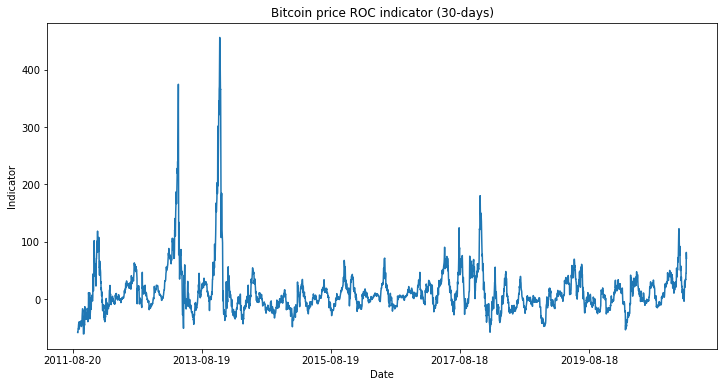

Number of observations by type


above_0_increasing    1114
above_0_decreasing     929
below_0_decreasing     776
below_0_increasing     654
Name: close_last_price, dtype: int64

In [18]:
#ROC or Rate of change
#The ROC is calculated as 100 * ((last_close_price(p) - last_close_price(p-n))/last_close_price(p-n))
#Important threshholds above or below 0. 
#If positive we will assign a value of 1 and 0 if negative.

def get_roc(series, n):
    close_price_n = series.rolling(n).apply(lambda x: x[0])
    roc = 100 * ((series - close_price_n) / close_price_n)
    #roc_1_0 = roc.apply(lambda x: 1 if x > 0 else 0)
    return roc

price_roc = get_roc(grouped_pct_change_df['close_last_price'], 30)

plt.figure(figsize=(12,6))
plt.plot(price_roc)
plt.title('Bitcoin price ROC indicator (30-days)')
plt.ylabel('Indicator')
plt.xlabel('Date')
plt.xticks(np.arange(0, len(grouped_pct_change_df['close_last_price'] + 1), 365*2))
plt.show()

#Building a series of categrical features fot the roc indicator.
roc_label_window = 2
roc_labels = price_roc.rolling(roc_label_window)\
                        .apply(lambda x: 1 if (x[-1] > 0 and x[-1]-x[0] > 0)\
                                    else (2 if (x[-1] > 0 and x[-1]-x[0] < 0) \
                                    else (3 if (x[-1] < 0 and x[-1]-x[0] > 0)\
                                    else 4)))

roc_labels = roc_labels.apply(lambda x: 'above_0_increasing' if x==1\
                                    else ('above_0_decreasing' if x==2 \
                                    else ('below_0_increasing' if x==3\
                                    else 'below_0_decreasing')))     


#roc_labels = price_roc.apply(lambda x: 'above_0' if x > 0 else 'below_0')

print('Number of observations by type')  
roc_labels.value_counts()

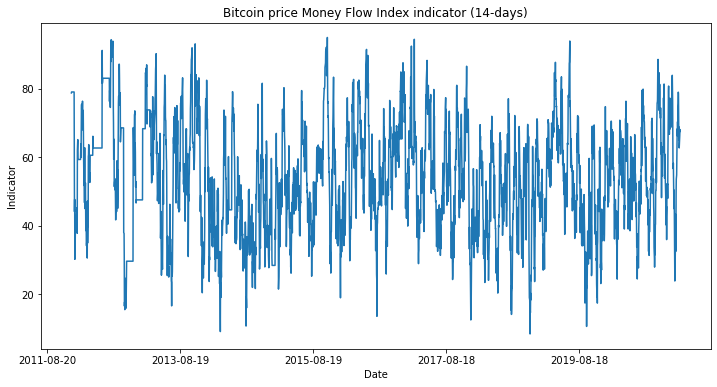

Number of observations by type


between_2080    3247
above_80         184
below_20          42
dtype: int64

In [19]:
#MFI or Money Flow Index
# The Money Flow Index (MFI) is a technical oscillator that uses price and volume data for identifying overbought
#or oversold signals in an asset.
#Important threshholds are >80 (overbought), <20 (oversold).

window_mfi = 14

def plot_series(series):
    plt.figure(figsize=(12,6))
    plt.plot(series)
    #plt.title('{}'.format(series))
    plt.ylabel('Indicator')
    plt.xlabel('Date')
    plt.xticks(np.arange(0, len(series + 1), 365*2))
    plt.show()                                                         
          
def get_mfi(close, high, low, volume, window):
    typical_price = (close + high + low) / 3
    #print('Typical price')
    #plot_series(typical_price)
    
    absolute_value = close.pct_change()/(close.pct_change().abs())
    #print(absolute_value.value_counts())
    
    raw_money_flow = typical_price * volume * absolute_value
    #print('Raw money flow')
    #plot_series(raw_money_flow)
    
    positive_series = raw_money_flow.rolling(window).apply(lambda x: np.sum(x[x>0]))
    negative_series = raw_money_flow.rolling(window).apply(lambda x: np.sum(x[x<0]))
    
    #plt.figure(figsize=(12,6))
    #plt.plot(positive_series)
    #plt.plot(negative_series)
    #plt.xticks(np.arange(0, len(positive_series + 1), 365*2))
    #plt.show()
                                                           
    money_flow_ratio = positive_series / (negative_series * -1)
    #print('Money flow ratio')
    #plot_series(money_flow_ratio)
    
    mfi = 100 - (100/(1 + money_flow_ratio))
    
    return mfi

mfi = get_mfi(grouped_pct_change_df['close_last_price'], 
              grouped_pct_change_df['high_max_price'], 
              grouped_pct_change_df['low_min_price'],
              grouped_pct_change_df['volume'], 14)

mfi = mfi.fillna(method='ffill')

#plotting the indicator.
plt.figure(figsize=(12,6))
plt.plot(mfi)
plt.title('Bitcoin price Money Flow Index indicator ({}-days)'.format(window_mfi))
plt.ylabel('Indicator')
plt.xlabel('Date')
plt.xticks(np.arange(0, len(grouped_pct_change_df['close_last_price'] + 1), 365*2))
plt.show()       

#Building a series of categrical features fot the mfi indicator.
mfi_label = mfi.apply(lambda x: 'above_80' if x > 80 else ('below_20' if x < 20 else 'between_2080')) 

print('Number of observations by type')  
mfi_label.value_counts()


In [20]:
#Putting all data to be used in a sigle DataFrame

#Normal data
data = grouped_pct_change_df[['close_mean', 'close_std', 'close_max', 'close_min', 'close_max-min', 'close_up_down',
                              'volume', 'volume_pct_change', 'volume_up_down']]

data = pd.concat([data, mfi_label, roc_labels, stochastic_label, rsi_label, macd_labels], axis=1)
data.columns = ['close_mean', 'close_std', 'close_max', 'close_min', 'close_max-min', 'close_up_down',
                'volume', 'volume_pct_change', 'volume_up_down', 'mfi_label', 'roc_labels', 'stochastic_label',
                'rsi_label', 'macd_labels']

#relu data
data_relu = grouped_relu_df[['close_mean', 'close_std', 'close_max', 'close_up_down', 'volume',
                             'volume_pct_change', 'volume_up_down']]

data_relu = pd.concat([data_relu, mfi_label, roc_labels, stochastic_label, rsi_label, macd_labels], axis=1)

data_relu.columns = ['close_mean', 'close_std', 'close_max', 'close_up_down', 'volume', 'volume_pct_change',
                'volume_up_down', 'mfi_label', 'roc_labels', 'stochastic_label', 'rsi_label', 'macd_labels']


#zscore data
data_zscore = grouped_zscore_df[['close_mean', 'close_std', 'close_max', 'close_min', 'close_max-min', 'close_up_down',
                              'volume', 'volume_pct_change', 'volume_up_down']]

data_zscore = pd.concat([data_zscore, mfi_label, roc_labels, stochastic_label, rsi_label, macd_labels], axis=1)
data_zscore.columns = ['close_mean', 'close_std', 'close_max', 'close_min', 'close_max-min', 'close_up_down',
                'volume', 'volume_pct_change', 'volume_up_down', 'mfi_label', 'roc_labels', 'stochastic_label',
                'rsi_label', 'macd_labels']

data.head()
data_relu.head()
data_zscore.head()

,close_mean,close_std,close_max,close_min,close_max-min,close_up_down,volume,volume_pct_change,volume_up_down,mfi_label,roc_labels,stochastic_label,rsi_label,macd_labels
2011-08-20,-0.001576,0.009052,0.341679,-0.001814,0.343493,0.0,0.085470,0.000000,0.0,between_2080,below_0_decreasing,between_2080,between_3070,below_0_decreasing
2011-08-21,-0.001814,0.000000,-0.001814,-0.001814,0.000000,0.0,0.085470,0.000000,0.0,between_2080,below_0_decreasing,between_2080,between_3070,below_0_decreasing
2011-08-22,-0.001814,0.000000,-0.001814,-0.001814,0.000000,0.0,0.028632,-66.499988,0.0,between_2080,below_0_decreasing,between_2080,between_3070,below_0_decreasing
2011-08-23,-0.001814,0.000000,-0.001814,-0.001814,0.000000,0.0,0.000000,-100.000000,0.0,between_2080,below_0_decreasing,between_2080,between_3070,below_0_decreasing
2011-08-24,-0.031473,0.635473,-0.001814,-17.460233,17.458419,0.0,2.356522,inf,1.0,between_2080,below_0_decreasing,between_2080,between_3070,below_0_decreasing


<H2>Plotting for EDA</H2>
<p>We make scatter plots of daily price statstics (mean, standard deviation, max, etc) and use the technical indicators as hue to look for possible clusters in the data.</p>

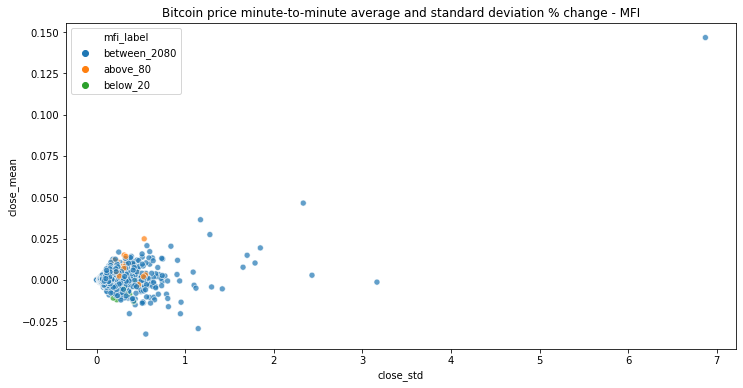

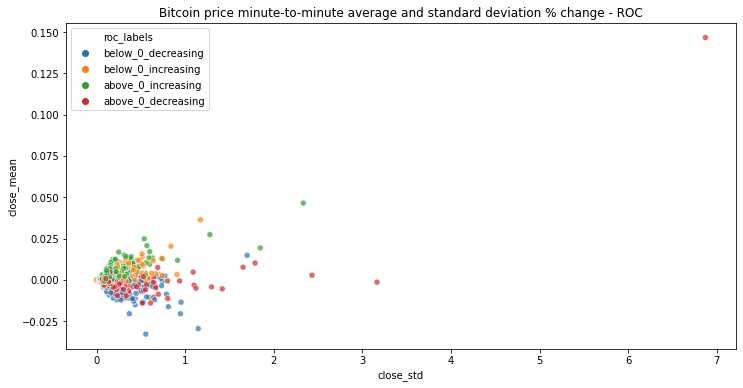

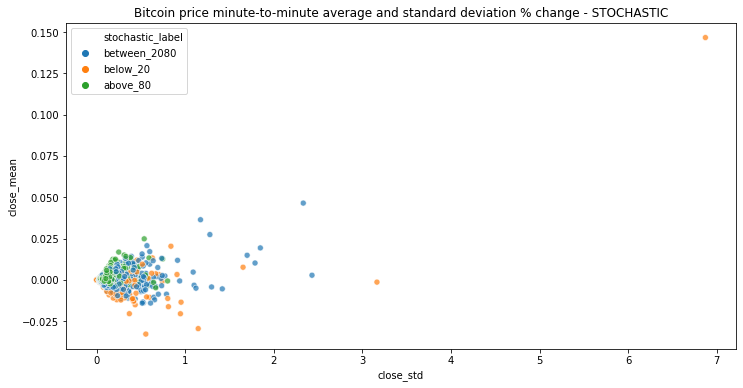

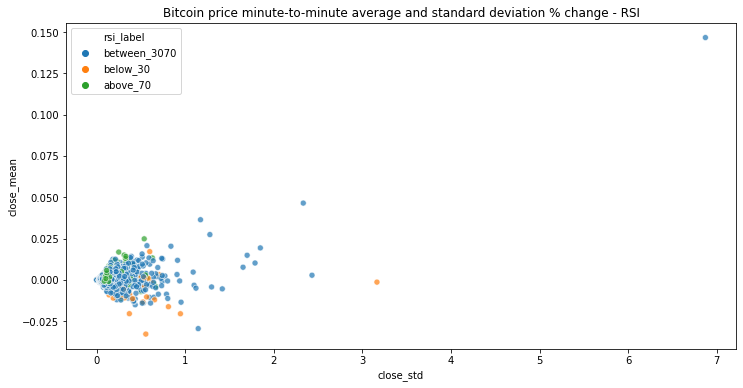

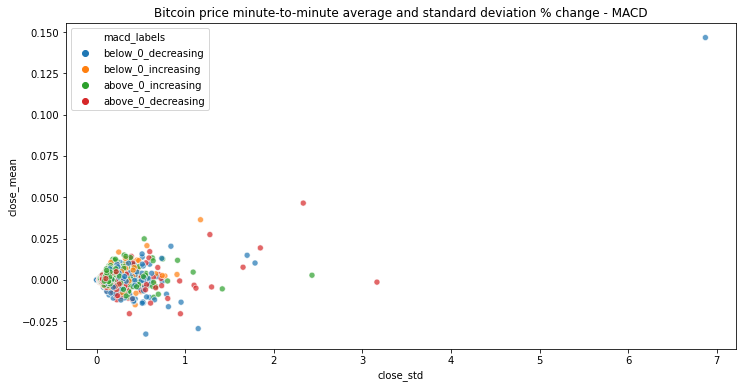

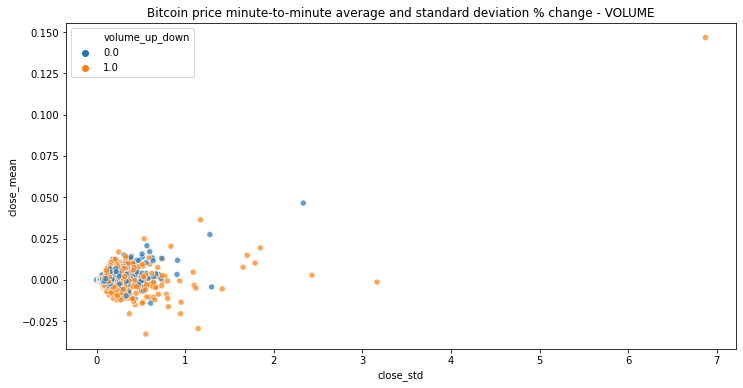

In [21]:
#Making scatterplots of mean and standard deviation of price % change using technical indicators as hue.

def get_scatterplot(title, data, x, y, hue):
    '''Makes a scatter plot of 2 series and 1 series as hue'''
    plt.figure(figsize=(12,6))
    plt.title(title)
    sns.scatterplot(x= x, y=y, data= data, hue=hue, alpha=0.7)
    #plt.xlim(0,4)
    #plt.ylim(-0.04,0.08)
    plt.ylabel(y)
    plt.xlabel(x)
    #plt.legend(loc='best')
    #plt.xticks(np.arange(0, len(grouped_pct_change_df['close_mean'] + 1), 365*2))
    plt.show()

    
get_scatterplot('Bitcoin price minute-to-minute average and standard deviation % change - MFI',
                data, 'close_std', 'close_mean', 'mfi_label')
    

get_scatterplot('Bitcoin price minute-to-minute average and standard deviation % change - ROC',
                data, 'close_std', 'close_mean', 'roc_labels')

get_scatterplot('Bitcoin price minute-to-minute average and standard deviation % change - STOCHASTIC',
                data, 'close_std', 'close_mean', 'stochastic_label')

get_scatterplot('Bitcoin price minute-to-minute average and standard deviation % change - RSI',
                data, 'close_std', 'close_mean', 'rsi_label')

get_scatterplot('Bitcoin price minute-to-minute average and standard deviation % change - MACD',
                data, 'close_std', 'close_mean', 'macd_labels')

get_scatterplot('Bitcoin price minute-to-minute average and standard deviation % change - VOLUME',
                data, 'close_std', 'close_mean', 'volume_up_down')


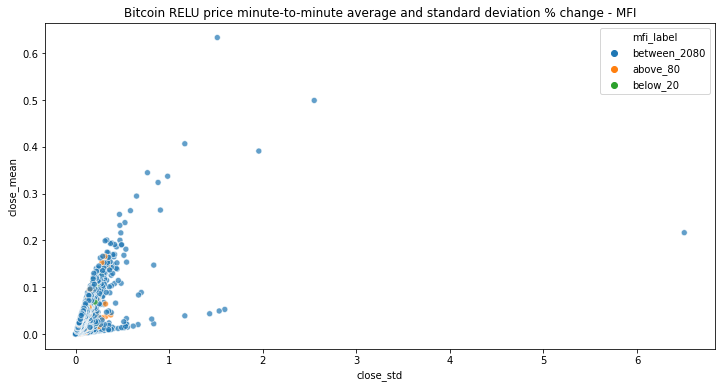

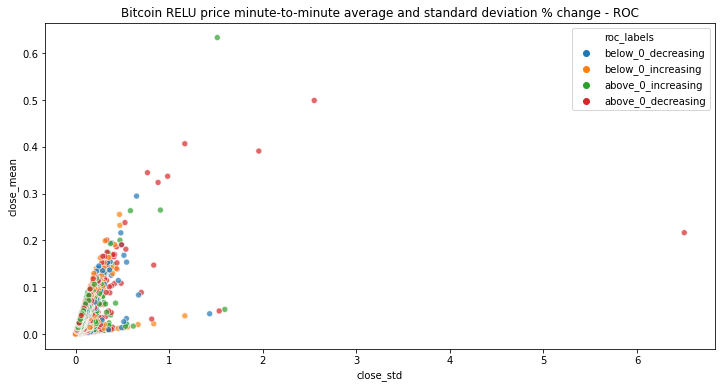

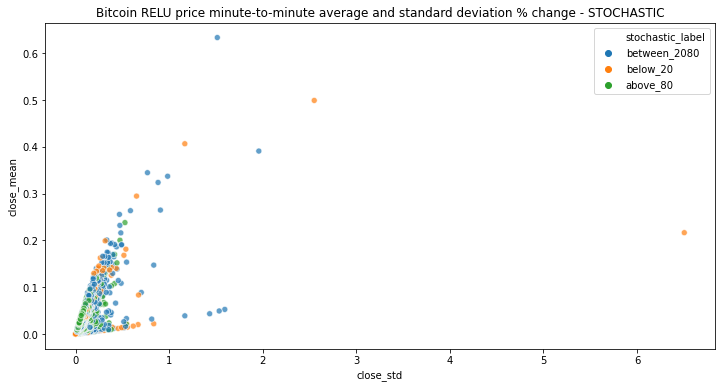

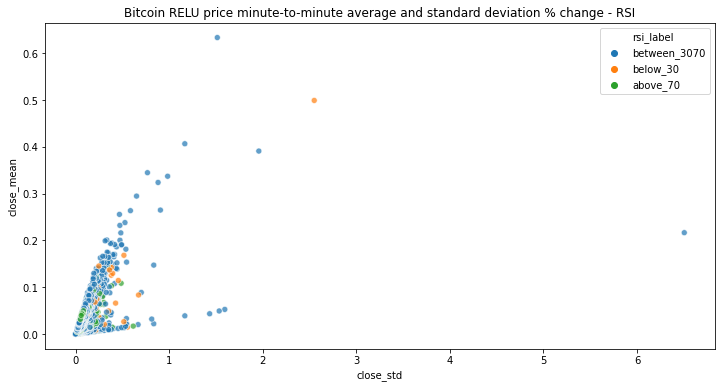

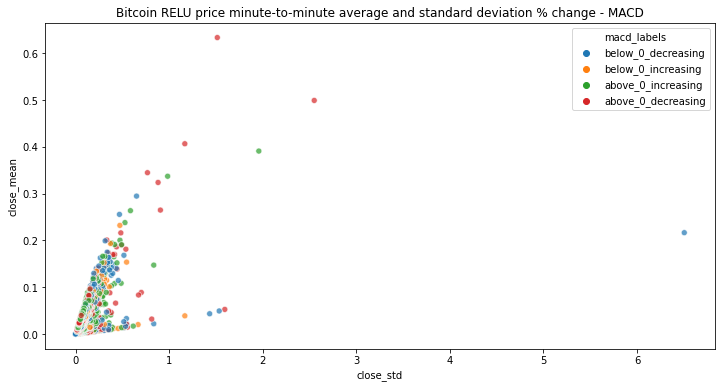

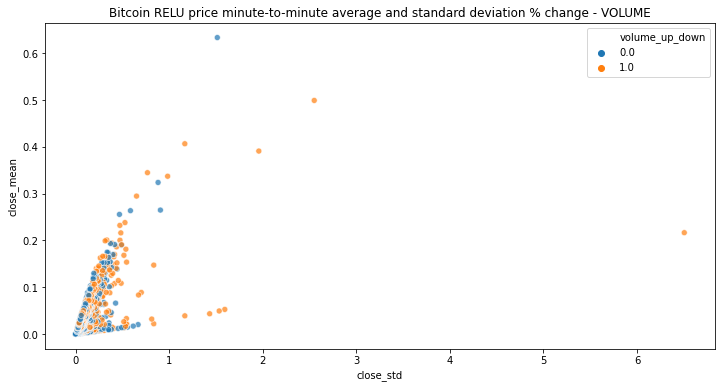

In [22]:
#Making scatterplots of mean and standard deviation of price % change using relu function 
#and technical indicators as hue.

get_scatterplot('Bitcoin RELU price minute-to-minute average and standard deviation % change - MFI',
                data_relu, 'close_std', 'close_mean', 'mfi_label')
    

get_scatterplot('Bitcoin RELU price minute-to-minute average and standard deviation % change - ROC',
                data_relu, 'close_std', 'close_mean', 'roc_labels')

get_scatterplot('Bitcoin RELU price minute-to-minute average and standard deviation % change - STOCHASTIC',
                data_relu, 'close_std', 'close_mean', 'stochastic_label')

get_scatterplot('Bitcoin RELU price minute-to-minute average and standard deviation % change - RSI',
                data_relu, 'close_std', 'close_mean', 'rsi_label')

get_scatterplot('Bitcoin RELU price minute-to-minute average and standard deviation % change - MACD',
                data_relu, 'close_std', 'close_mean', 'macd_labels')

get_scatterplot('Bitcoin RELU price minute-to-minute average and standard deviation % change - VOLUME',
                data_relu, 'close_std', 'close_mean', 'volume_up_down')


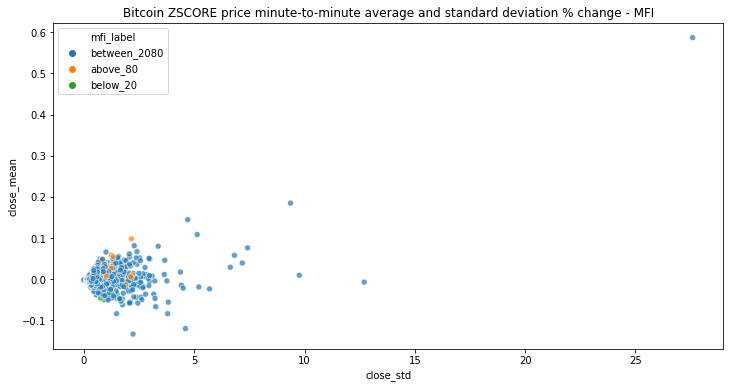

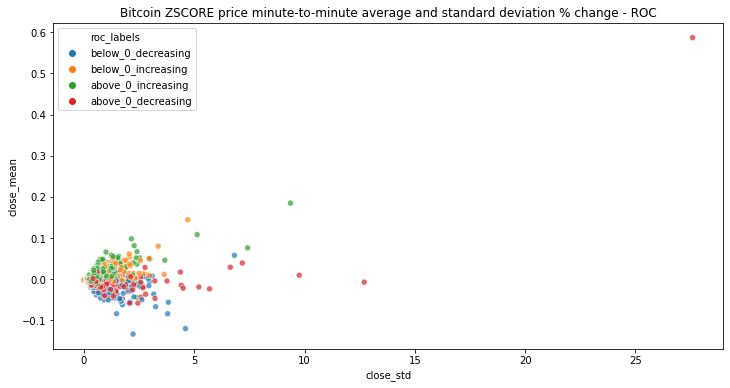

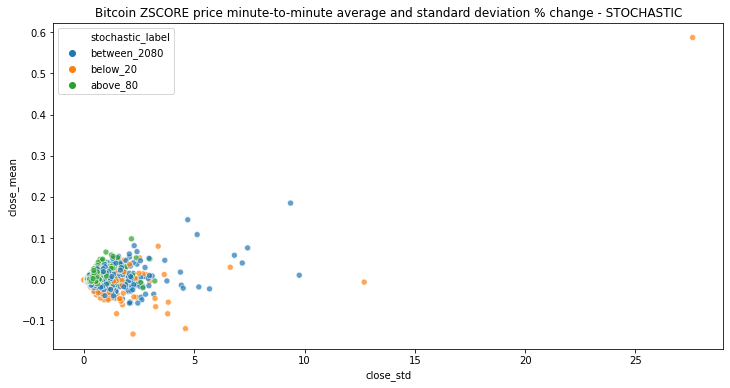

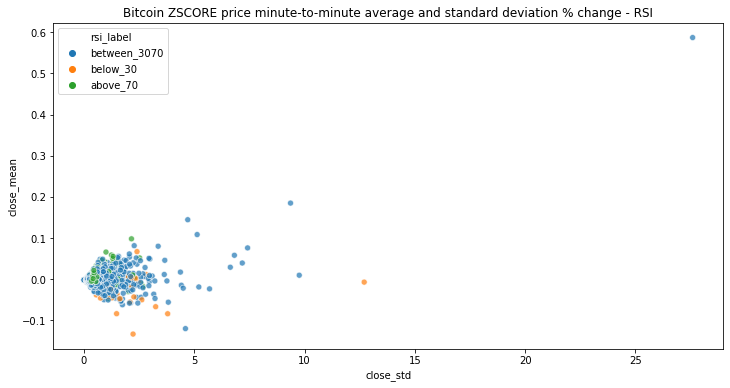

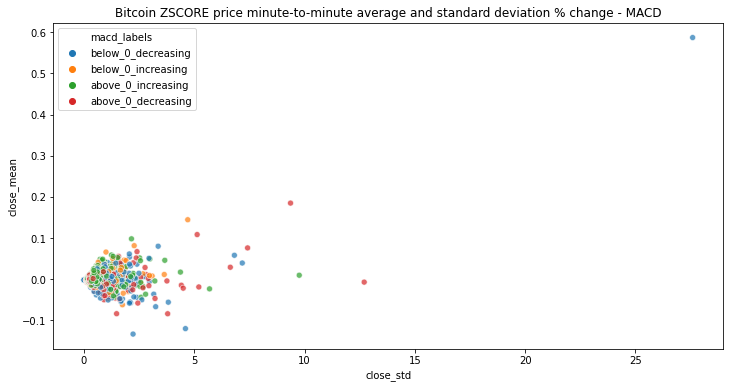

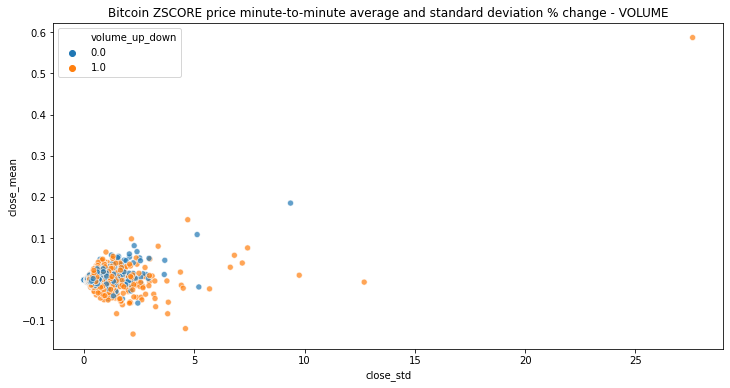

In [23]:
#Making scatterplots of mean and standard deviation of price % change using z-score function 
#and technical indicators as hue.

get_scatterplot('Bitcoin ZSCORE price minute-to-minute average and standard deviation % change - MFI',
                data_zscore, 'close_std', 'close_mean', 'mfi_label')
    

get_scatterplot('Bitcoin ZSCORE price minute-to-minute average and standard deviation % change - ROC',
                data_zscore, 'close_std', 'close_mean', 'roc_labels')

get_scatterplot('Bitcoin ZSCORE price minute-to-minute average and standard deviation % change - STOCHASTIC',
                data_zscore, 'close_std', 'close_mean', 'stochastic_label')

get_scatterplot('Bitcoin ZSCORE price minute-to-minute average and standard deviation % change - RSI',
                data_zscore, 'close_std', 'close_mean', 'rsi_label')

get_scatterplot('Bitcoin ZSCORE price minute-to-minute average and standard deviation % change - MACD',
                data_zscore, 'close_std', 'close_mean', 'macd_labels')

get_scatterplot('Bitcoin ZSCORE price minute-to-minute average and standard deviation % change - VOLUME',
                data_zscore, 'close_std', 'close_mean', 'volume_up_down')

In [24]:
#EDA using daily moves data.

daily_moves = pd.read_csv('../data/processed/daily_moves.csv', index_col = 0)
daily_moves.head()

,open-close,open-max,open-min,min-close,min-max,max-close
date,,,,,,
2011-08-20,0.085543,0.085543,0.00000,0.085543,0.085543,0.00000
2011-08-21,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000
2011-08-22,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000
2011-08-23,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000
2011-08-24,-10.256410,0.000000,-10.25641,0.000000,11.428571,-10.25641


In [25]:
#Adding technical indicators to daily_moves
daily_moves = pd.concat([daily_moves, mfi_label, roc_labels, stochastic_label, rsi_label, macd_labels], axis=1)
daily_moves.columns = ['open-close', 'open-max', 'open-min', 'min-close', 'min-max', 'max-close', 'mfi_label',
                       'roc_labels', 'stochastic_label', 'rsi_label', 'macd_labels']

daily_moves.head()

,open-close,open-max,open-min,min-close,min-max,max-close,mfi_label,roc_labels,stochastic_label,rsi_label,macd_labels
date,,,,,,,,,,,
2011-08-20,0.085543,0.085543,0.00000,0.085543,0.085543,0.00000,between_2080,below_0_decreasing,between_2080,between_3070,below_0_decreasing
2011-08-21,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,between_2080,below_0_decreasing,between_2080,between_3070,below_0_decreasing
2011-08-22,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,between_2080,below_0_decreasing,between_2080,between_3070,below_0_decreasing
2011-08-23,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,between_2080,below_0_decreasing,between_2080,between_3070,below_0_decreasing
2011-08-24,-10.256410,0.000000,-10.25641,0.000000,11.428571,-10.25641,between_2080,below_0_decreasing,between_2080,between_3070,below_0_decreasing


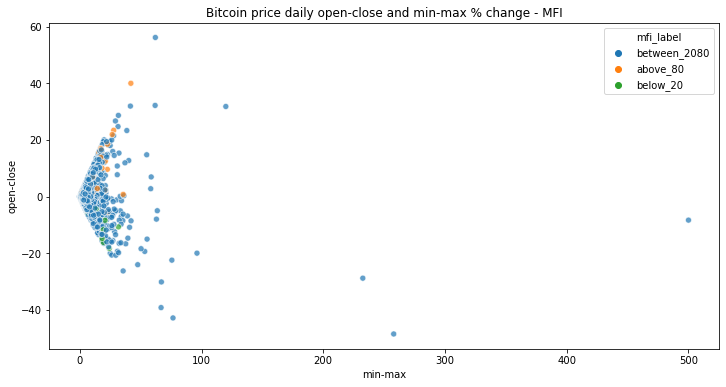

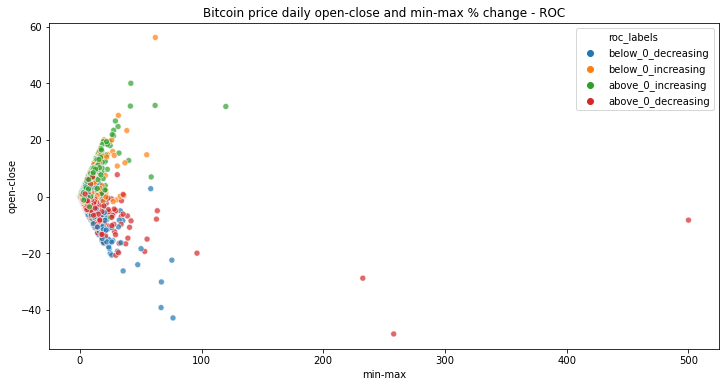

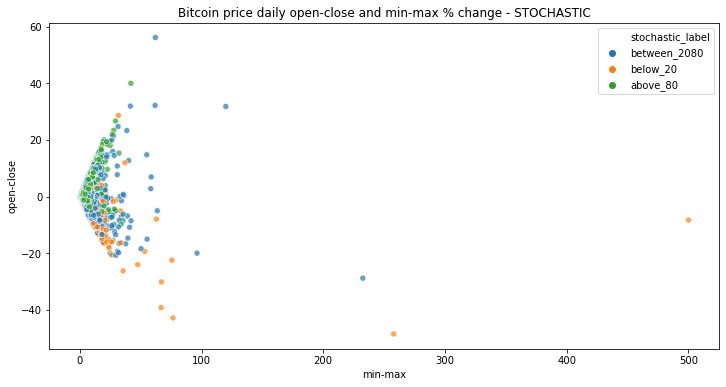

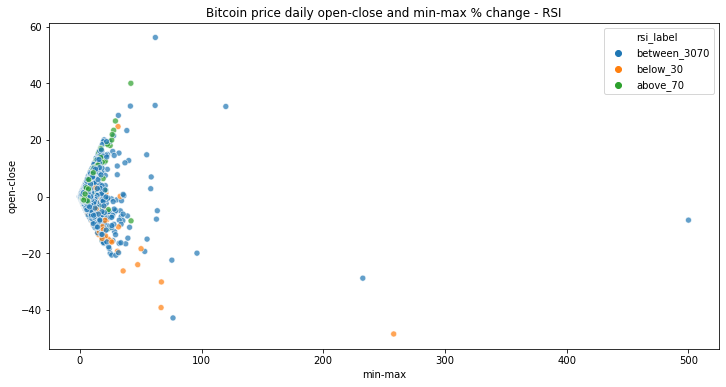

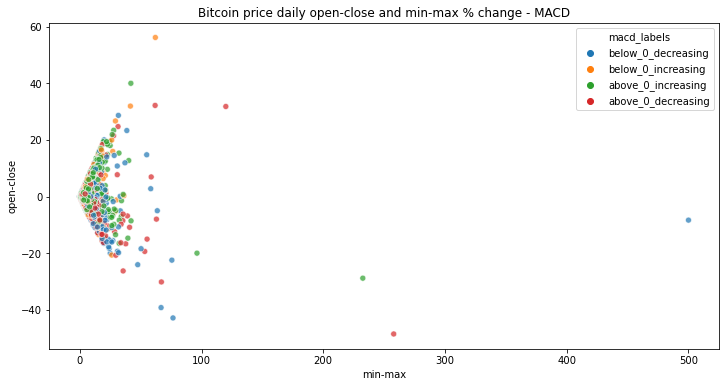

In [26]:
#Scatter plots of open-close and min-max % change
get_scatterplot('Bitcoin price daily open-close and min-max % change - MFI', daily_moves, 'min-max', 'open-close',
                'mfi_label')
    

get_scatterplot('Bitcoin price daily open-close and min-max % change - ROC', daily_moves, 'min-max', 'open-close',
                'roc_labels')

get_scatterplot('Bitcoin price daily open-close and min-max % change - STOCHASTIC', daily_moves, 'min-max', 'open-close',
                'stochastic_label')

get_scatterplot('Bitcoin price daily open-close and min-max % change - RSI', daily_moves, 'min-max', 'open-close',
                'rsi_label')

get_scatterplot('Bitcoin price daily open-close and min-max % change - MACD', daily_moves, 'min-max', 'open-close',
                'macd_labels')



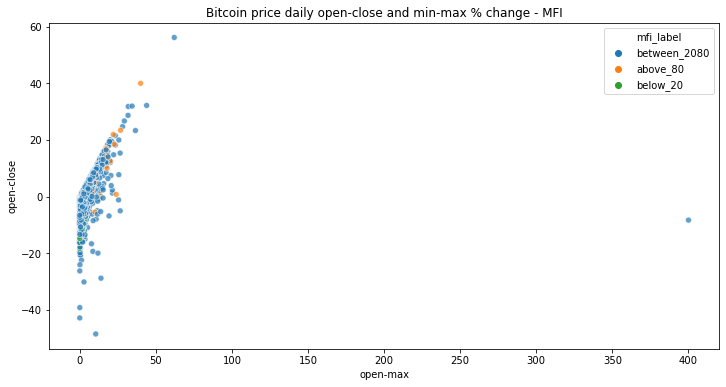

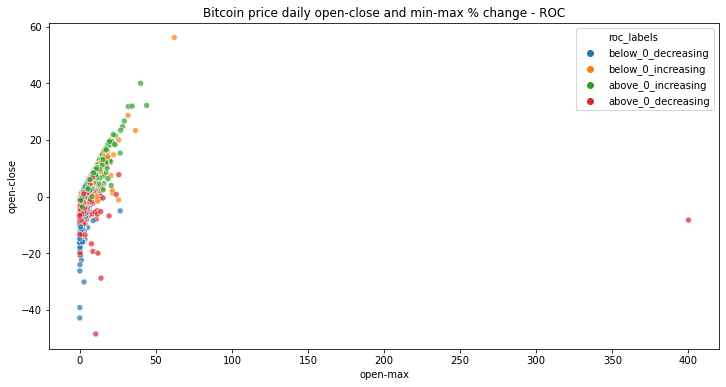

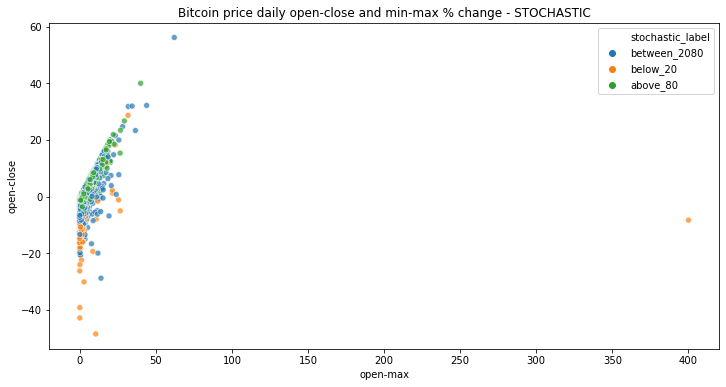

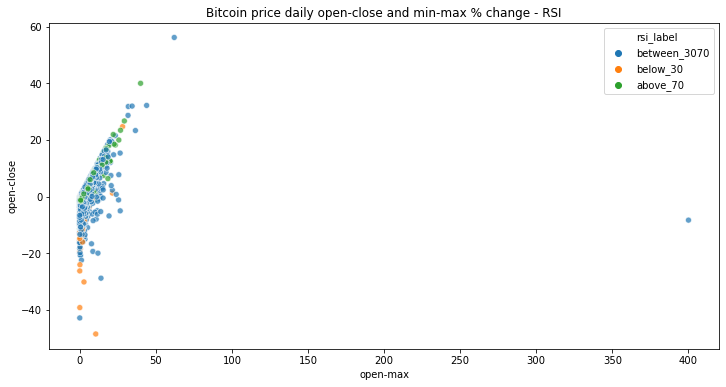

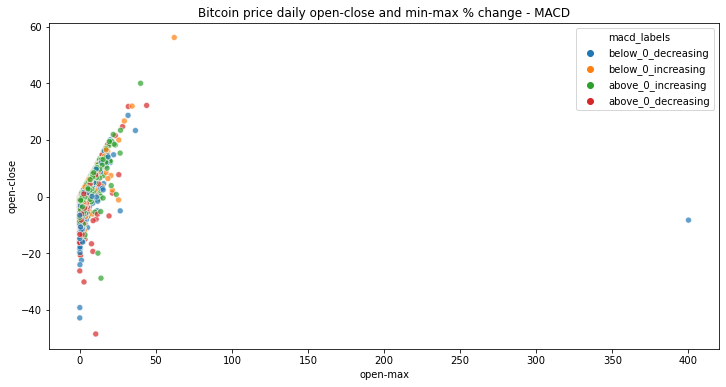

In [27]:
#Scatter plots of open-close and open-max % change

get_scatterplot('Bitcoin price daily open-close and min-max % change - MFI', daily_moves, 'open-max', 'open-close',
                'mfi_label')
    

get_scatterplot('Bitcoin price daily open-close and min-max % change - ROC', daily_moves, 'open-max', 'open-close',
                'roc_labels')

get_scatterplot('Bitcoin price daily open-close and min-max % change - STOCHASTIC', daily_moves, 'open-max', 'open-close',
                'stochastic_label')

get_scatterplot('Bitcoin price daily open-close and min-max % change - RSI', daily_moves, 'open-max', 'open-close',
                'rsi_label')

get_scatterplot('Bitcoin price daily open-close and min-max % change - MACD', daily_moves, 'open-max', 'open-close',
                'macd_labels')

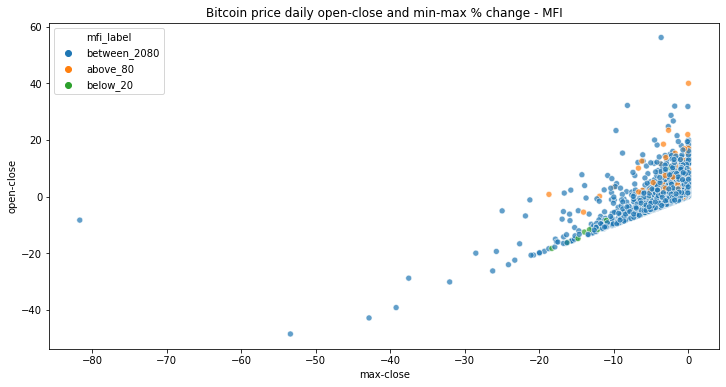

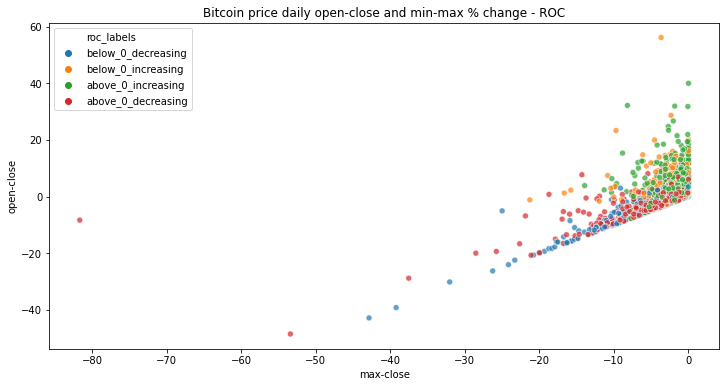

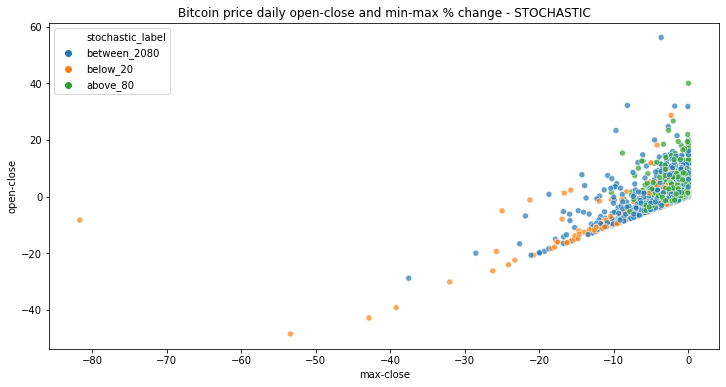

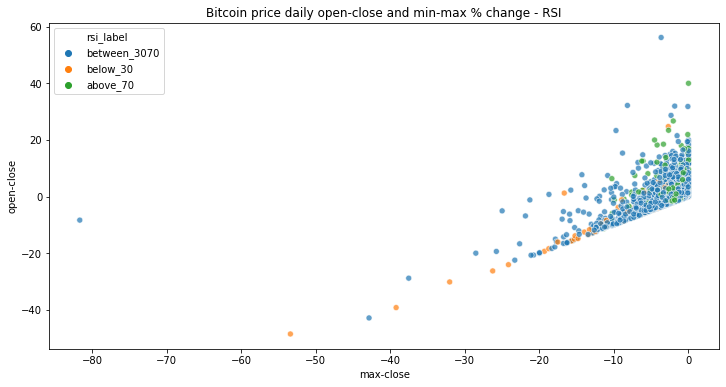

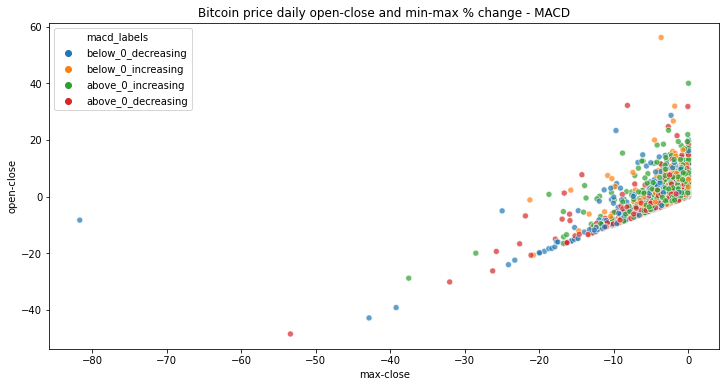

In [28]:
#Scatter plots of open-close and max-close % change

get_scatterplot('Bitcoin price daily open-close and min-max % change - MFI', daily_moves, 'max-close', 'open-close',
                'mfi_label')
    

get_scatterplot('Bitcoin price daily open-close and min-max % change - ROC', daily_moves, 'max-close', 'open-close',
                'roc_labels')

get_scatterplot('Bitcoin price daily open-close and min-max % change - STOCHASTIC', daily_moves, 'max-close', 'open-close',
                'stochastic_label')

get_scatterplot('Bitcoin price daily open-close and min-max % change - RSI', daily_moves, 'max-close', 'open-close',
                'rsi_label')

get_scatterplot('Bitcoin price daily open-close and min-max % change - MACD', daily_moves, 'max-close', 'open-close',
                'macd_labels')

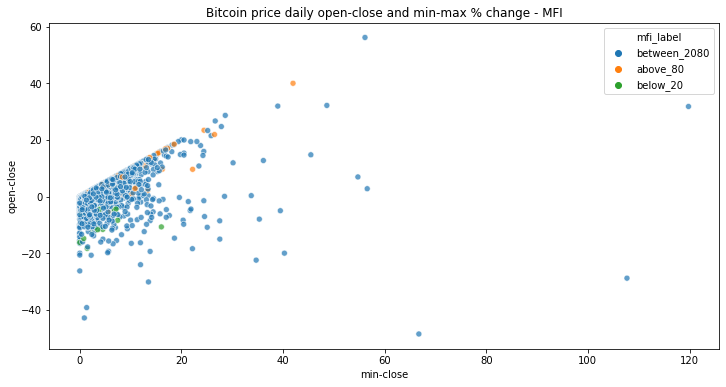

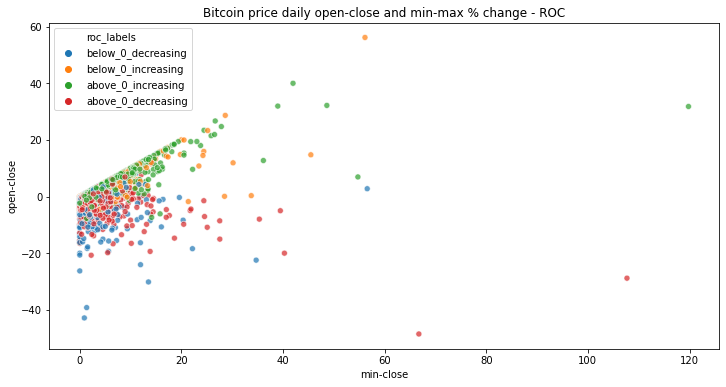

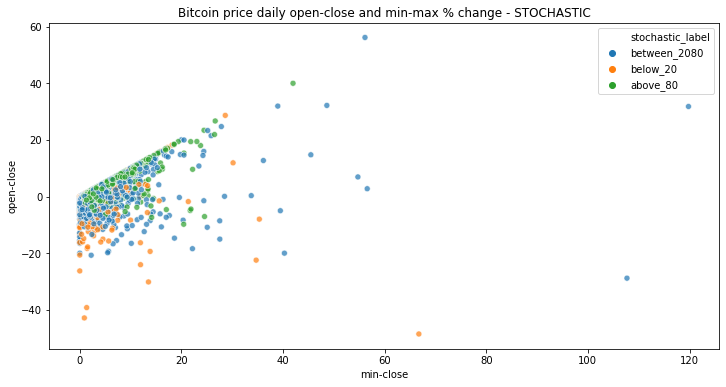

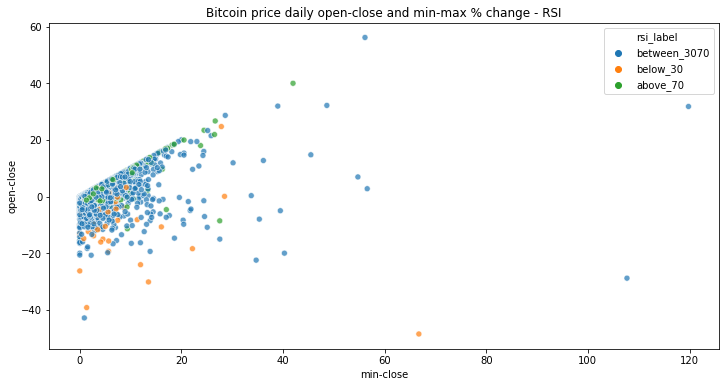

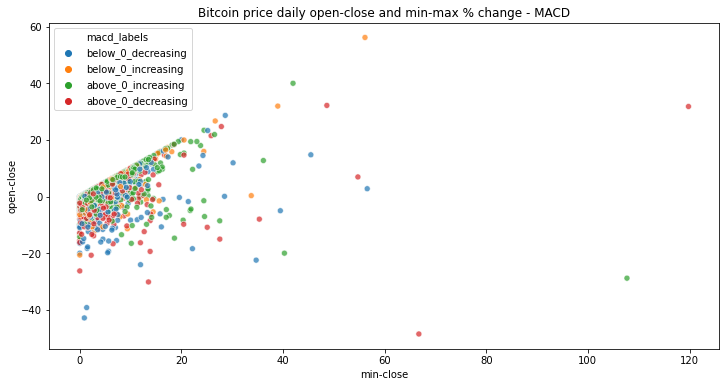

In [29]:
#Scatter plots of open-close and min-close % change

get_scatterplot('Bitcoin price daily open-close and min-max % change - MFI', daily_moves, 'min-close', 'open-close',
                'mfi_label')
    

get_scatterplot('Bitcoin price daily open-close and min-max % change - ROC', daily_moves, 'min-close', 'open-close',
                'roc_labels')

get_scatterplot('Bitcoin price daily open-close and min-max % change - STOCHASTIC', daily_moves, 'min-close', 'open-close',
                'stochastic_label')

get_scatterplot('Bitcoin price daily open-close and min-max % change - RSI', daily_moves, 'min-close', 'open-close',
                'rsi_label')

get_scatterplot('Bitcoin price daily open-close and min-max % change - MACD', daily_moves, 'min-close', 'open-close',
                'macd_labels')

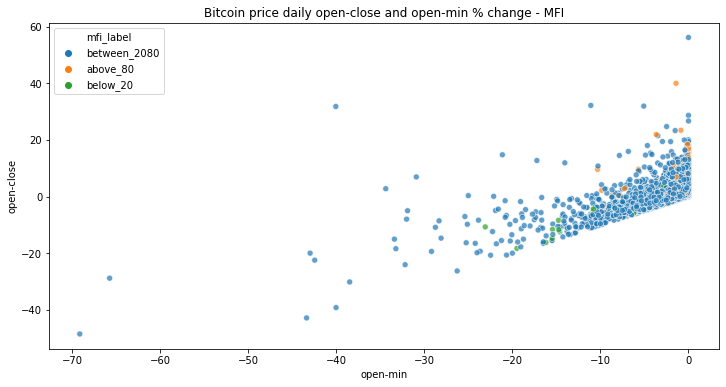

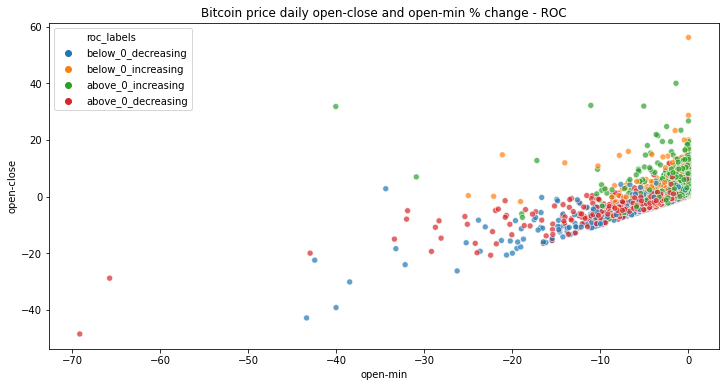

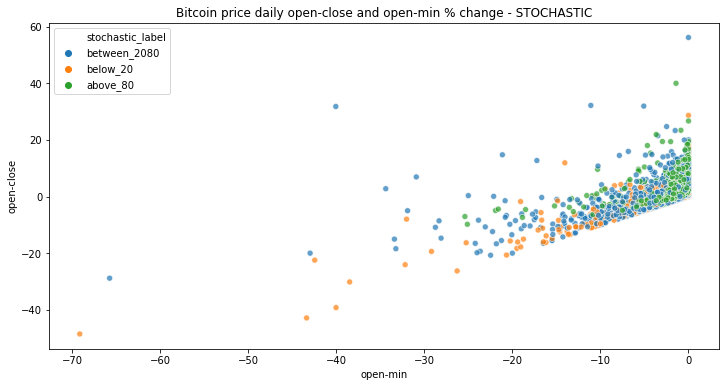

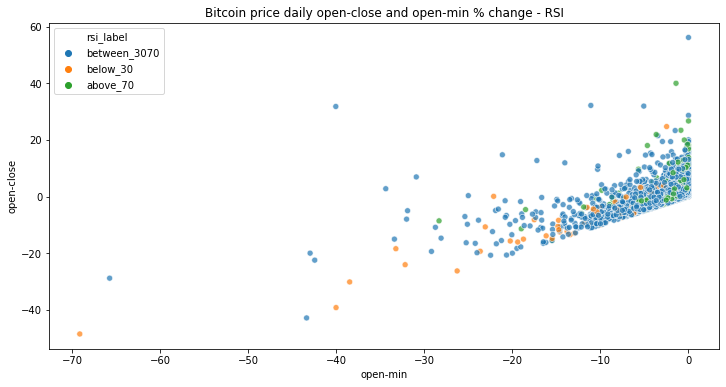

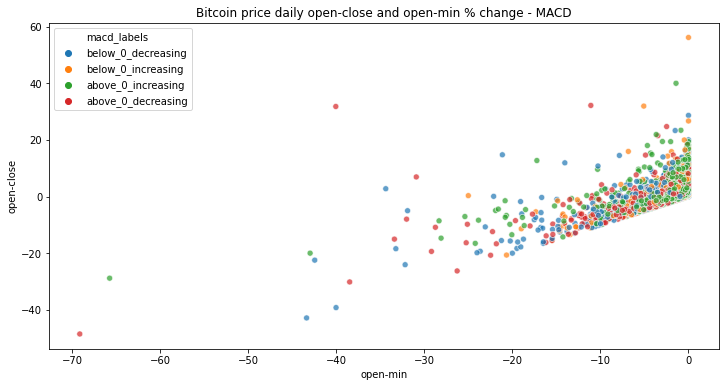

In [30]:
#Scatter plots of open-close and open-min % change
get_scatterplot('Bitcoin price daily open-close and open-min % change - MFI', daily_moves, 'open-min', 'open-close',
                'mfi_label')
    

get_scatterplot('Bitcoin price daily open-close and open-min % change - ROC', daily_moves, 'open-min', 'open-close',
                'roc_labels')

get_scatterplot('Bitcoin price daily open-close and open-min % change - STOCHASTIC', daily_moves, 'open-min', 'open-close',
                'stochastic_label')

get_scatterplot('Bitcoin price daily open-close and open-min % change - RSI', daily_moves, 'open-min', 'open-close',
                'rsi_label')

get_scatterplot('Bitcoin price daily open-close and open-min % change - MACD', daily_moves, 'open-min', 'open-close',
                'macd_labels')


<h2>Conclusions</h2>
<ul>
    <li>Clusters seem to form using data of grouped_pct_change_df, grouped_z-score_df and daily_moves. Relu data does not seem to form clusters</li>
    <li>Technical indicators that show more clusters are ROC, stochastic, rsi and mfi in that order. MACD does not seem to form clusters</li>